In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


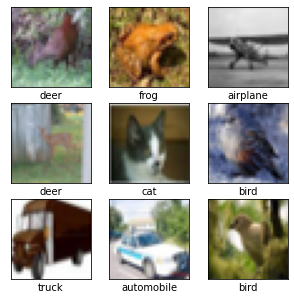

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


class_names = ['airplane', 'automobile', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse',
              'ship', 'truck']

sample_size = 9
random_idx = np.random.randint(50000, size=sample_size) # 수정 x_train 이 총 50000 개 이므로 60000이 아니라 50000 입니다. 
plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[idx], cmap = 'gray')
    plt.xlabel(class_names[int(y_train[idx])])
plt.show()

In [ ]:
# cifar 10 학습시키기
# - batch normalization
# - drop out

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=200, epochs=50, validation_split=0.1)

In [ ]:
import cv2
animal = cv2.imread('./horse.webp')

In [ ]:
animal = cv2.resize(animal, (32,32))

In [ ]:
animal.shape

In [ ]:
plt.imshow(animal)

In [ ]:
animal_test = animal.reshape(1,32,32,3)

In [ ]:
animal_test_predict = np.argmax(model.predict(animal_test))

In [ ]:
animal_test_predict

In [ ]:
plt.xticks([])
plt.yticks([])
plt.imshow(animal, cmap = 'gray')
plt.xlabel(class_names[int(animal_test_predict)])